<a href="https://colab.research.google.com/github/bannis14/Portfolio-Projects/blob/main/Time_Series_Forecast/Facebook_Prophet_Parameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facebook Prophet - Parameter Tuning

## Libraries and Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change directory
%cd /content/drive/MyDrive/Time Series Forecasting Product

/content/drive/MyDrive/Time Series Forecasting Product


In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.model_selection import ParameterGrid

In [ ]:
# Load the data
# YYYY-MM-DD
df = pd.read_csv('nyc_data.csv')
df.head()

,Date,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2015,720.000885,0,0,0,3.68,41.305
1,1/2/2015,581.276773,0,0,0,4.73,131.574
2,1/3/2015,754.117039,0,0,0,7.23,162.700
3,1/4/2015,622.252774,0,0,0,10.96,160.281
4,1/5/2015,785.373319,0,0,0,6.92,51.077


In [ ]:
# Rename variable
df = df.rename(columns={'Demand': 'y',
                        'Date': 'ds'})
df.head(0)

,ds,y,Easter,Thanksgiving,Christmas,Temperature,Marketing


In [ ]:
# Date variable
df.ds = pd.to_datetime(df.ds,
                       format="%m/%d/%Y")
df.ds

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
2187   2020-12-27
2188   2020-12-28
2189   2020-12-29
2190   2020-12-30
2191   2020-12-31
Name: ds, Length: 2192, dtype: datetime64[ns]

## Holiday Handling

In [ ]:
# Easter
dates = pd.to_datetime(df[df.Easter == 1].ds)
easter = pd.DataFrame({'holiday': 'easter',
                       'ds': dates,
                       'lower_window': -5,
                       'upper_window': 2})

In [ ]:
# Thanksgiving
dates = pd.to_datetime(df[df.Thanksgiving == 1].ds)
thanksgiving = pd.DataFrame({'holiday': 'thanksgiving',
                             'ds': dates,
                             'lower_window': -3,
                             'upper_window': 6})
thanksgiving

,holiday,ds,lower_window,upper_window
329,thanksgiving,2015-11-26,-3,6
693,thanksgiving,2016-11-24,-3,6
1057,thanksgiving,2017-11-23,-3,6
1421,thanksgiving,2018-11-22,-3,6
1792,thanksgiving,2019-11-28,-3,6
2156,thanksgiving,2020-11-26,-3,6


In [ ]:
# Combining events
holidays = pd.concat([easter, thanksgiving])
holidays

,holiday,ds,lower_window,upper_window
94,easter,2015-04-05,-5,2
451,easter,2016-03-27,-5,2
836,easter,2017-04-16,-5,2
1186,easter,2018-04-01,-5,2
1571,easter,2019-04-21,-5,2
1928,easter,2020-04-12,-5,2
329,thanksgiving,2015-11-26,-3,6
693,thanksgiving,2016-11-24,-3,6
1057,thanksgiving,2017-11-23,-3,6
1421,thanksgiving,2018-11-22,-3,6


In [ ]:
df = df.drop(columns=["Easter", "Thanksgiving"])
df.head(0)

,ds,y,Christmas,Temperature,Marketing


## Facebook Prophet Model

In [ ]:
# FB model
m = Prophet(holidays=holidays,
            seasonality_mode='multiplicative',
            seasonality_prior_scale=10,
            holidays_prior_scale=10,
            changepoint_prior_scale=0.05)
m.add_regressor('Christmas')
m.add_regressor('Temperature')
m.add_regressor('Marketing')
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/dfg5xthd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/wwkg3cyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76028', 'data', 'file=/tmp/tmp_mziwyad/dfg5xthd.json', 'init=/tmp/tmp_mziwyad/wwkg3cyv.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model55gas3t3/prophet_model-20231129001011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Check how many observations
df.shape[0] - 180

2012

In [ ]:
# Cross-validation
df_cv = cross_validation(m,
                         horizon='31 days',
                         period='16 days',
                         initial='2012 days',
                         parallel='processes')
df_cv.head()

INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a7a251180>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/hqhhknq5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/qupimfdj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/rasesbkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43741', 'data', 'file=/tmp/tmp_mziwyad/qupimfdj.json', 'init=/tmp/tmp_mziwyad/rasesbkc.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelukn2b20h/prophet_model-20231129001012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/frh0gur8.json
00:10:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DE

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-10,607.367413,539.105174,670.530452,571.069531,2020-07-09
1,2020-07-11,722.175178,658.889933,792.073573,677.106981,2020-07-09
2,2020-07-12,637.038170,570.521908,706.719940,619.572774,2020-07-09
3,2020-07-13,769.300007,701.781500,835.321488,808.932621,2020-07-09
4,2020-07-14,636.676862,569.234644,701.752271,661.791644,2020-07-09


In [ ]:
# Performance
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,2828.051674,53.179429,43.364264,0.058925,0.060902,0.060042,0.767742
1,5 days,2814.628898,53.053076,44.401202,0.062050,0.064086,0.062879,0.735484
2,6 days,3519.971111,59.329344,50.463632,0.069747,0.064086,0.071202,0.670968
3,7 days,2800.210189,52.917012,42.919490,0.060501,0.058957,0.061577,0.700000
4,8 days,2756.975543,52.506909,40.490978,0.055964,0.056503,0.057483,0.732258


In [ ]:
# RMSE and MAPE
print("RMSE: ", round(performance_metrics(df_cv)["rmse"].mean(), 1))
print("MAPE: ", 100 * round(performance_metrics(df_cv)["mape"].mean(), 3), "%")

RMSE:  53.8
MAPE:  5.800000000000001 %


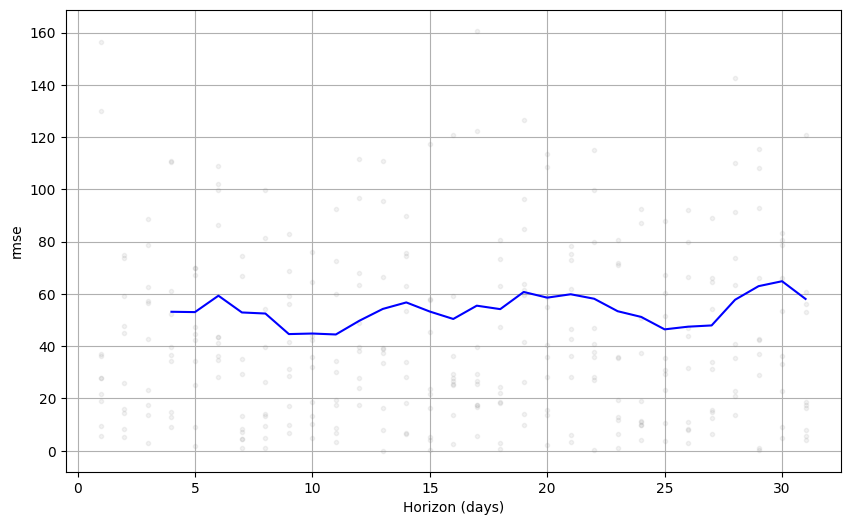

In [ ]:
# Plotting
plot_cross_validation_metric(df_cv, metric='rmse');

## Parameter Tuning

In [ ]:
# Parameter Grid
param_grid = {'seasonality_mode': ["additive", 'multiplicative'],
              'seasonality_prior_scale': [1, 5, 10, 20],
              'holidays_prior_scale': [5, 10, 20, 25],
              'changepoint_prior_scale': [0.005, 0.01, 0.05, 0.1]}
grid = ParameterGrid(param_grid)
len(list(grid))

128

In [ ]:
# Store the results
rmse = []

In [ ]:
# Loop
i = 1
for params in grid:
    print(f"{i} / {len(list(grid))}")
    # Model
    m = Prophet(holidays=holidays,
                seasonality_mode=params['seasonality_mode'],
                seasonality_prior_scale=params['seasonality_prior_scale'],
                holidays_prior_scale=params['holidays_prior_scale'],
                changepoint_prior_scale=params['changepoint_prior_scale'])
    m.add_regressor('Christmas')
    m.add_regressor('Temperature')
    m.add_regressor('Marketing')
    m.fit(df)

    # CV
    df_cv = cross_validation(m,
                             horizon='31 days',
                             period='16 days',
                             initial='2012 days',
                             parallel='processes')

    # Measure the error and store the result
    error = performance_metrics(df_cv)["rmse"].mean()
    rmse.append(error)

    i += 1

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/jub19ouu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/82l8zfxi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27770', 'data', 'file=/tmp/tmp_mziwyad/jub19ouu.json', 'init=/tmp/tmp_mziwyad/82l8zfxi.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelcqf1ndum/prophet_model-20231129001028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79487c70>
DEBUG:cmdstanpy:input tempfile:

2 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/7kcn7o58.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71830', 'data', 'file=/tmp/tmp_mziwyad/e_06ph59.json', 'init=/tmp/tmp_mziwyad/7kcn7o58.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelgkk813ro/prophet_model-20231129001040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79485bd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/34ddmisk.json
DEBUG:cmdstanpy:input tempfile:

3 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/quw17m32.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18036', 'data', 'file=/tmp/tmp_mziwyad/x2agz63x.json', 'init=/tmp/tmp_mziwyad/quw17m32.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model95683r8x/prophet_model-20231129001049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a790881f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/lsx1n0e4.json
DEBUG:cmdstanpy:input tempfile:

4 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/hylku3sp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89553', 'data', 'file=/tmp/tmp_mziwyad/hz_lvlyd.json', 'init=/tmp/tmp_mziwyad/hylku3sp.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelxdda0yr4/prophet_model-20231129001059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79089030>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/rlesb6ci.json
DEBUG:cmdstanpy:input tempfile:

5 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/av9y1jh_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16645', 'data', 'file=/tmp/tmp_mziwyad/buy3q_wg.json', 'init=/tmp/tmp_mziwyad/av9y1jh_.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model6wum3eoq/prophet_model-20231129001108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:11:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a794210c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/na2pr8hd.json
DEBUG:cmdstanpy:input tempfile:

6 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/hztv0ksn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93636', 'data', 'file=/tmp/tmp_mziwyad/zxy4_ggv.json', 'init=/tmp/tmp_mziwyad/hztv0ksn.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model_f4x3k0i/prophet_model-20231129001115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:11:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79484400>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/1bzmo8n1.json
DEBUG:cmdstanpy:input tempfile:

7 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/ec9gj6oj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79279', 'data', 'file=/tmp/tmp_mziwyad/9io_6lxv.json', 'init=/tmp/tmp_mziwyad/ec9gj6oj.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelqolaqg2y/prophet_model-20231129001125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:11:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:11:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fc3cd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/hm4v_a0q.json
DEBUG:cmdstanpy:input tempfile:

8 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/f9pugnq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44719', 'data', 'file=/tmp/tmp_mziwyad/l8pphwf_.json', 'init=/tmp/tmp_mziwyad/f9pugnq0.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model1zabdr4c/prophet_model-20231129001132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79484c70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/2t69tvtx.json
DEBUG:cmdstanpy:input tempfile:

9 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/kl00lxv9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63493', 'data', 'file=/tmp/tmp_mziwyad/sqntjwyb.json', 'init=/tmp/tmp_mziwyad/kl00lxv9.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelq90f9_n7/prophet_model-20231129001143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:11:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79043190>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/dy3y8a5w.json
DEBUG:cmdstanpy:input tempfile:

10 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/90igw6rb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27931', 'data', 'file=/tmp/tmp_mziwyad/0vm9jqz4.json', 'init=/tmp/tmp_mziwyad/90igw6rb.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modele77bsjft/prophet_model-20231129001150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:11:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:11:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a797a5cc0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/dwylf3s2.json
DEBUG:cmdstanpy:input tempfile:

11 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/y6igyce7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18761', 'data', 'file=/tmp/tmp_mziwyad/jviykam4.json', 'init=/tmp/tmp_mziwyad/y6igyce7.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model1u8e3w8e/prophet_model-20231129001159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:11:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a794208b0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/2m4vf3dg.json
DEBUG:cmdstanpy:input tempfile:

12 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/aka89wvx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2117', 'data', 'file=/tmp/tmp_mziwyad/knkdmnq1.json', 'init=/tmp/tmp_mziwyad/aka89wvx.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modeljj4mvn8m/prophet_model-20231129001208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:12:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fc3b80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/_td7twdh.json
DEBUG:cmdstanpy:input tempfile: 

13 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/jh1ddmfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31904', 'data', 'file=/tmp/tmp_mziwyad/gfvh_nd_.json', 'init=/tmp/tmp_mziwyad/jh1ddmfd.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelpj5u742f/prophet_model-20231129001216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:12:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a794208b0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/10lkzves.json
DEBUG:cmdstanpy:input tempfile:

14 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/2i3tbdt0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6587', 'data', 'file=/tmp/tmp_mziwyad/4825d8ux.json', 'init=/tmp/tmp_mziwyad/2i3tbdt0.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model0fwmwukp/prophet_model-20231129001227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:12:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fc3730>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/kmta2bm4.json
DEBUG:cmdstanpy:input tempfile: 

15 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/6iv3xt69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25744', 'data', 'file=/tmp/tmp_mziwyad/0uzbpfmn.json', 'init=/tmp/tmp_mziwyad/6iv3xt69.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model4jlfoyt2/prophet_model-20231129001234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:12:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79485660>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/oli5mei1.json
DEBUG:cmdstanpy:input tempfile:

16 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/5kdbu0pr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84107', 'data', 'file=/tmp/tmp_mziwyad/z3sszh37.json', 'init=/tmp/tmp_mziwyad/5kdbu0pr.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model7lburx32/prophet_model-20231129001244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:12:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79487e80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/l1ia3onp.json
DEBUG:cmdstanpy:input tempfile:

17 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/wp0m1w4q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78063', 'data', 'file=/tmp/tmp_mziwyad/6dnv6c1c.json', 'init=/tmp/tmp_mziwyad/wp0m1w4q.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model0atjsmil/prophet_model-20231129001251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:12:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79040670>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/glvthon1.json
DEBUG:cmdstanpy:input tempfile:

18 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/z4092wgg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60546', 'data', 'file=/tmp/tmp_mziwyad/3fs4x2rs.json', 'init=/tmp/tmp_mziwyad/z4092wgg.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelb7ndhe5x/prophet_model-20231129001301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:13:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fc3730>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/x8yaezk_.json
DEBUG:cmdstanpy:input tempfile:

19 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/kvvfxs2o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47446', 'data', 'file=/tmp/tmp_mziwyad/uyjtcn8r.json', 'init=/tmp/tmp_mziwyad/kvvfxs2o.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model6118iguf/prophet_model-20231129001308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:13:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79423f10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/mqzoo5f8.json
DEBUG:cmdstanpy:input tempfile:

20 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/afai_m3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2977', 'data', 'file=/tmp/tmp_mziwyad/bt9wttgz.json', 'init=/tmp/tmp_mziwyad/afai_m3v.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelmnnpu9a3/prophet_model-20231129001318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:13:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79072740>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/qnwkyr89.json
DEBUG:cmdstanpy:input tempfile: 

21 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/ljp5y8bh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32857', 'data', 'file=/tmp/tmp_mziwyad/nn4oatno.json', 'init=/tmp/tmp_mziwyad/ljp5y8bh.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelviqalbyh/prophet_model-20231129001326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:13:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fc1db0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/n76z_yul.json
DEBUG:cmdstanpy:input tempfile:

22 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/a33jq6in.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23575', 'data', 'file=/tmp/tmp_mziwyad/dgvx5qk7.json', 'init=/tmp/tmp_mziwyad/a33jq6in.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modeljrplz5a2/prophet_model-20231129001335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:13:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a794d8d60>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/thsvjq_v.json
DEBUG:cmdstanpy:input tempfile:

23 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/9wt1bsjc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84716', 'data', 'file=/tmp/tmp_mziwyad/z6380e8q.json', 'init=/tmp/tmp_mziwyad/9wt1bsjc.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model2jtbe39p/prophet_model-20231129001343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:13:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f4d4e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/s1g3ci5c.json
DEBUG:cmdstanpy:input tempfile:

24 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/mqnqrcsz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58958', 'data', 'file=/tmp/tmp_mziwyad/4sb9p403.json', 'init=/tmp/tmp_mziwyad/mqnqrcsz.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelbgb51hw_/prophet_model-20231129001352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:13:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79485de0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/rew3khkr.json
DEBUG:cmdstanpy:input tempfile:

25 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/mib8ew52.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62483', 'data', 'file=/tmp/tmp_mziwyad/da32acjr.json', 'init=/tmp/tmp_mziwyad/mib8ew52.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelxjmi1frm/prophet_model-20231129001400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:14:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79485450>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/upe2pjk7.json
DEBUG:cmdstanpy:input tempfile:

26 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/5mvujkbt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50001', 'data', 'file=/tmp/tmp_mziwyad/ycjfo_v3.json', 'init=/tmp/tmp_mziwyad/5mvujkbt.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelhuar0omc/prophet_model-20231129001407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:14:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f4d300>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/yj1sor3f.json
DEBUG:cmdstanpy:input tempfile:

27 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/t21zwjxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62691', 'data', 'file=/tmp/tmp_mziwyad/kkti1vw0.json', 'init=/tmp/tmp_mziwyad/t21zwjxv.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelix3ssoji/prophet_model-20231129001417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:14:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79484b80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/wwwxvfo2.json
DEBUG:cmdstanpy:input tempfile:

28 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/ge7oic2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61493', 'data', 'file=/tmp/tmp_mziwyad/ev3mrkbb.json', 'init=/tmp/tmp_mziwyad/ge7oic2e.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelt7a8xhzf/prophet_model-20231129001425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:14:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79073c40>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/eomldyrn.json
DEBUG:cmdstanpy:input tempfile:

29 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/yn4a9n9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86922', 'data', 'file=/tmp/tmp_mziwyad/1wav0kd8.json', 'init=/tmp/tmp_mziwyad/yn4a9n9e.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelobdc2j7l/prophet_model-20231129001434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:14:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79420850>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/v6llasid.json
DEBUG:cmdstanpy:input tempfile:

30 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/h147n57o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18833', 'data', 'file=/tmp/tmp_mziwyad/6jxw7yqj.json', 'init=/tmp/tmp_mziwyad/h147n57o.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelbcvpa9l5/prophet_model-20231129001441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:14:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79420850>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/6qaw5uuv.json
DEBUG:cmdstanpy:input tempfile:

31 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/fv3mx925.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82043', 'data', 'file=/tmp/tmp_mziwyad/mb2n9x18.json', 'init=/tmp/tmp_mziwyad/fv3mx925.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model77a8xe4k/prophet_model-20231129001451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:14:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a794dbf10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/zqdqi1uw.json
DEBUG:cmdstanpy:input tempfile:

32 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/_a6pcu3k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22271', 'data', 'file=/tmp/tmp_mziwyad/cj8szgu9.json', 'init=/tmp/tmp_mziwyad/_a6pcu3k.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelg45h32wy/prophet_model-20231129001458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:14:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79072d40>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/tcrdml9n.json
DEBUG:cmdstanpy:input tempfile:

33 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/rc3j3zp9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75274', 'data', 'file=/tmp/tmp_mziwyad/cxc0puon.json', 'init=/tmp/tmp_mziwyad/rc3j3zp9.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelrfqjb8kz/prophet_model-20231129001508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79484b80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/x823x3_1.json
DEBUG:cmdstanpy:input tempfile:

34 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/xj0e8djq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65409', 'data', 'file=/tmp/tmp_mziwyad/o0mbe0ob.json', 'init=/tmp/tmp_mziwyad/xj0e8djq.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelft829dwb/prophet_model-20231129001516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79062d70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/bhb84w7e.json
DEBUG:cmdstanpy:input tempfile:

35 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/cz4klfap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54335', 'data', 'file=/tmp/tmp_mziwyad/qutvn52x.json', 'init=/tmp/tmp_mziwyad/cz4klfap.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelrp5wubh4/prophet_model-20231129001526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79484b80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/_bu77_as.json
DEBUG:cmdstanpy:input tempfile:

36 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/rf3osj8h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10834', 'data', 'file=/tmp/tmp_mziwyad/jg0nzcc1.json', 'init=/tmp/tmp_mziwyad/rf3osj8h.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model290ymtbk/prophet_model-20231129001534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fe7e50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/s5zg3whu.json
DEBUG:cmdstanpy:input tempfile:

37 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/8uo_xjsc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/ktr6yevk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58495', 'data', 'file=/tmp/tmp_mziwyad/8uo_xjsc.json', 'init=/tmp/tmp_mziwyad/ktr6yevk.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model36fo5axn/prophet_model-20231129001543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a794db310>
DEBUG:cmdstanpy:input tempfile:

38 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/yqclgd7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60283', 'data', 'file=/tmp/tmp_mziwyad/4xk7oshq.json', 'init=/tmp/tmp_mziwyad/yqclgd7w.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modeloe_v00it/prophet_model-20231129001551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79061b70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/tjw6yrk0.json
DEBUG:cmdstanpy:input tempfile:

39 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/2x7d9533.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39396', 'data', 'file=/tmp/tmp_mziwyad/wniggijq.json', 'init=/tmp/tmp_mziwyad/2x7d9533.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelguvayr_i/prophet_model-20231129001559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79421990>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/rhrdoe_y.json
DEBUG:cmdstanpy:input tempfile:

40 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/d7pd29yx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55125', 'data', 'file=/tmp/tmp_mziwyad/dkh50di2.json', 'init=/tmp/tmp_mziwyad/d7pd29yx.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelcagmoy8k/prophet_model-20231129001608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:16:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f4fac0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/ph9k2hpt.json
DEBUG:cmdstanpy:input tempfile:

41 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/3ayzs6ml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46756', 'data', 'file=/tmp/tmp_mziwyad/alu82ivu.json', 'init=/tmp/tmp_mziwyad/3ayzs6ml.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model_1pa3c5_/prophet_model-20231129001616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:16:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fe5510>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/yyqvwoiu.json
DEBUG:cmdstanpy:input tempfile:

42 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/mnzpj1rj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23995', 'data', 'file=/tmp/tmp_mziwyad/8iod_ssd.json', 'init=/tmp/tmp_mziwyad/mnzpj1rj.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model6tvz652f/prophet_model-20231129001626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:16:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79073250>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/0gg27tcu.json
DEBUG:cmdstanpy:input tempfile:

43 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/16ct2m67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42462', 'data', 'file=/tmp/tmp_mziwyad/_vkoloqa.json', 'init=/tmp/tmp_mziwyad/16ct2m67.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modell9yv9pij/prophet_model-20231129001633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:16:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f50850>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/kkytr299.json
DEBUG:cmdstanpy:input tempfile:

44 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/glkzfw4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55764', 'data', 'file=/tmp/tmp_mziwyad/qd48xp0p.json', 'init=/tmp/tmp_mziwyad/glkzfw4f.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelcx3wdpmf/prophet_model-20231129001643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:16:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a797a5cc0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/bptlqryo.json
DEBUG:cmdstanpy:input tempfile:

45 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/1bdxlra4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61235', 'data', 'file=/tmp/tmp_mziwyad/hxdxser5.json', 'init=/tmp/tmp_mziwyad/1bdxlra4.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelu3k2dhnq/prophet_model-20231129001650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:16:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79061690>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/xndtd405.json
DEBUG:cmdstanpy:input tempfile:

46 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/1j_9k0pl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/5vtdaead.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63100', 'data', 'file=/tmp/tmp_mziwyad/1j_9k0pl.json', 'init=/tmp/tmp_mziwyad/5vtdaead.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modell5gu5igh/prophet_model-20231129001701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:17:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a797a5cc0>
DEBUG:cmdstanpy:input tempfile:

47 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/jyxn5rlo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34857', 'data', 'file=/tmp/tmp_mziwyad/08jyn_m4.json', 'init=/tmp/tmp_mziwyad/jyxn5rlo.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model2gpn_rky/prophet_model-20231129001708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:17:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f4e3b0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/q3y2y_iu.json
DEBUG:cmdstanpy:input tempfile:

48 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/wsgrnr22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70147', 'data', 'file=/tmp/tmp_mziwyad/uyj6wmr2.json', 'init=/tmp/tmp_mziwyad/wsgrnr22.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modeltf3abijc/prophet_model-20231129001718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:17:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79061d50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/f7mjnahu.json
DEBUG:cmdstanpy:input tempfile:

49 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/iplxba26.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79383', 'data', 'file=/tmp/tmp_mziwyad/3g4covok.json', 'init=/tmp/tmp_mziwyad/iplxba26.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modeldlk6ajav/prophet_model-20231129001725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:17:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79060550>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/6muoehvb.json
DEBUG:cmdstanpy:input tempfile:

50 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/2bseyivs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32563', 'data', 'file=/tmp/tmp_mziwyad/2zvhue1o.json', 'init=/tmp/tmp_mziwyad/2bseyivs.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelwlz79xju/prophet_model-20231129001734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:17:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a797a5cc0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/p1o24njt.json
DEBUG:cmdstanpy:input tempfile:

51 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/wo5lqd9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70771', 'data', 'file=/tmp/tmp_mziwyad/cj4ht4ge.json', 'init=/tmp/tmp_mziwyad/wo5lqd9f.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelb4dt7dfb/prophet_model-20231129001742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:17:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fe51e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/7dovwc5d.json
DEBUG:cmdstanpy:input tempfile:

52 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/gt4upe7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57978', 'data', 'file=/tmp/tmp_mziwyad/uofds3z0.json', 'init=/tmp/tmp_mziwyad/gt4upe7u.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelnah1xz_x/prophet_model-20231129001751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:17:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:17:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79062bf0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/s187hhey.json
DEBUG:cmdstanpy:input tempfile:

53 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/u3r7qqkj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5889', 'data', 'file=/tmp/tmp_mziwyad/fp80l7j2.json', 'init=/tmp/tmp_mziwyad/u3r7qqkj.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelhk2rzi2b/prophet_model-20231129001800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:18:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f50ca0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/3lqw65i5.json
DEBUG:cmdstanpy:input tempfile: 

54 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/wvoew7dm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31789', 'data', 'file=/tmp/tmp_mziwyad/oosgb0ur.json', 'init=/tmp/tmp_mziwyad/wvoew7dm.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelc5byjrvj/prophet_model-20231129001810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:18:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79062b60>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/cftx9xlx.json
DEBUG:cmdstanpy:input tempfile:

55 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/aljyapse.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4036', 'data', 'file=/tmp/tmp_mziwyad/6mfe9b8p.json', 'init=/tmp/tmp_mziwyad/aljyapse.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model53fo5aic/prophet_model-20231129001819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:18:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f52620>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/6eyx_h40.json
DEBUG:cmdstanpy:input tempfile: 

56 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/ou555v38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73692', 'data', 'file=/tmp/tmp_mziwyad/593zpoit.json', 'init=/tmp/tmp_mziwyad/ou555v38.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelps3wak2l/prophet_model-20231129001828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:18:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79062170>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/ykeqmsh7.json
DEBUG:cmdstanpy:input tempfile:

57 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/t5g3b4an.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90351', 'data', 'file=/tmp/tmp_mziwyad/1j2h8149.json', 'init=/tmp/tmp_mziwyad/t5g3b4an.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model26q791za/prophet_model-20231129001837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:18:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fb5c30>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/qpetl2cs.json
DEBUG:cmdstanpy:input tempfile:

58 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/mc6ra4gf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70219', 'data', 'file=/tmp/tmp_mziwyad/65cus2_e.json', 'init=/tmp/tmp_mziwyad/mc6ra4gf.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelb49chaoa/prophet_model-20231129001844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:18:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a790730d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/5fclqidk.json
DEBUG:cmdstanpy:input tempfile:

59 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/jv0ulkiq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77898', 'data', 'file=/tmp/tmp_mziwyad/l8hdds7v.json', 'init=/tmp/tmp_mziwyad/jv0ulkiq.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modeluy9m2ms9/prophet_model-20231129001854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:18:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fbd750>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/4zjutfxb.json
DEBUG:cmdstanpy:input tempfile:

60 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/_rpy37wa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44792', 'data', 'file=/tmp/tmp_mziwyad/annpmq2t.json', 'init=/tmp/tmp_mziwyad/_rpy37wa.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelgj6cbf3o/prophet_model-20231129001900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:19:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a794d97e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/ebak2uym.json
DEBUG:cmdstanpy:input tempfile:

61 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/uj8_xt17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74546', 'data', 'file=/tmp/tmp_mziwyad/p6q02fmg.json', 'init=/tmp/tmp_mziwyad/uj8_xt17.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelpeyxcocy/prophet_model-20231129001910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:19:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f528c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/wgrdo603.json
DEBUG:cmdstanpy:input tempfile:

62 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/g7imc8un.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28293', 'data', 'file=/tmp/tmp_mziwyad/vosqo1wk.json', 'init=/tmp/tmp_mziwyad/g7imc8un.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelnuqr1ola/prophet_model-20231129001918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:19:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79062bf0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/grzibgl_.json
DEBUG:cmdstanpy:input tempfile:

63 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/tmd65n3c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17876', 'data', 'file=/tmp/tmp_mziwyad/wu9yj9er.json', 'init=/tmp/tmp_mziwyad/tmd65n3c.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model1czw244t/prophet_model-20231129001928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:19:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f47850>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/syf1kgx9.json
DEBUG:cmdstanpy:input tempfile:

64 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/lpckc3ij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37907', 'data', 'file=/tmp/tmp_mziwyad/q70_49ep.json', 'init=/tmp/tmp_mziwyad/lpckc3ij.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelzfany7i5/prophet_model-20231129001936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fbc1c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/oh69k19b.json
DEBUG:cmdstanpy:input tempfile:

65 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/mp23zzcf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58042', 'data', 'file=/tmp/tmp_mziwyad/ycydpscy.json', 'init=/tmp/tmp_mziwyad/mp23zzcf.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modell2ta99bt/prophet_model-20231129001945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:19:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fb16c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/7b6y5nss.json
DEBUG:cmdstanpy:input tempfile:

66 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/pbeig6_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86751', 'data', 'file=/tmp/tmp_mziwyad/z_4re_iq.json', 'init=/tmp/tmp_mziwyad/pbeig6_b.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model4l2acx3u/prophet_model-20231129001956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:19:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fe4ca0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/k2a_8849.json
DEBUG:cmdstanpy:input tempfile:

67 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/6qmn0dxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54285', 'data', 'file=/tmp/tmp_mziwyad/0jodwl5h.json', 'init=/tmp/tmp_mziwyad/6qmn0dxy.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelnt9nv623/prophet_model-20231129002009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f441f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/18yoic_s.json
DEBUG:cmdstanpy:input tempfile:

68 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/pdj2kz6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=899', 'data', 'file=/tmp/tmp_mziwyad/l4fnbhs3.json', 'init=/tmp/tmp_mziwyad/pdj2kz6k.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model5gntecwz/prophet_model-20231129002021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fe4ca0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/7pnzd8ob.json
DEBUG:cmdstanpy:input tempfile: /

69 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/jws4k84j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82239', 'data', 'file=/tmp/tmp_mziwyad/3bee6epn.json', 'init=/tmp/tmp_mziwyad/jws4k84j.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modellbhmuqmn/prophet_model-20231129002032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f468f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/8t5noaiw.json
DEBUG:cmdstanpy:input tempfile:

70 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/adx2ziwe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33948', 'data', 'file=/tmp/tmp_mziwyad/rf1wfnqg.json', 'init=/tmp/tmp_mziwyad/adx2ziwe.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modellcfefio5/prophet_model-20231129002044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f8b340>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/fh9wq00c.json
DEBUG:cmdstanpy:input tempfile:

71 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/1lrzkf7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96268', 'data', 'file=/tmp/tmp_mziwyad/2ylndg83.json', 'init=/tmp/tmp_mziwyad/1lrzkf7u.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelu3aglgc9/prophet_model-20231129002056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fb0370>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/ph8nxuzu.json
DEBUG:cmdstanpy:input tempfile:

72 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/a4l74st4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76793', 'data', 'file=/tmp/tmp_mziwyad/ealmzyg4.json', 'init=/tmp/tmp_mziwyad/a4l74st4.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model_q7t_gpv/prophet_model-20231129002107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78ff0190>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/bip1b5rx.json
DEBUG:cmdstanpy:input tempfile:

73 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/saw9cptl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64922', 'data', 'file=/tmp/tmp_mziwyad/stjqvov3.json', 'init=/tmp/tmp_mziwyad/saw9cptl.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelx21gdymb/prophet_model-20231129002120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fbed40>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/m7e3rv47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmd

74 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/bpz7jwv2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99812', 'data', 'file=/tmp/tmp_mziwyad/xacobnhj.json', 'init=/tmp/tmp_mziwyad/bpz7jwv2.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model5lg9hrmp/prophet_model-20231129002131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a790730d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/flk4dz8y.json
DEBUG:cmdstanpy:input tempfile:

75 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/v0pdomzj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25105', 'data', 'file=/tmp/tmp_mziwyad/3__j15f3.json', 'init=/tmp/tmp_mziwyad/v0pdomzj.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelv2s8n6le/prophet_model-20231129002143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f442e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/p4ubd9sf.json
DEBUG:cmdstanpy:input tempfile:

76 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/3lspe0nk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93859', 'data', 'file=/tmp/tmp_mziwyad/x1gkid2k.json', 'init=/tmp/tmp_mziwyad/3lspe0nk.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modeltddgwihs/prophet_model-20231129002155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f88910>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/9np6pf9x.json
DEBUG:cmdstanpy:input tempfile:

77 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/k882ptll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6310', 'data', 'file=/tmp/tmp_mziwyad/rurki935.json', 'init=/tmp/tmp_mziwyad/k882ptll.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model97wus4rh/prophet_model-20231129002205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:22:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f89de0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/g0yjjzt5.json
DEBUG:cmdstanpy:input tempfile: 

78 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/vdec1s_k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88816', 'data', 'file=/tmp/tmp_mziwyad/lgq5flt_.json', 'init=/tmp/tmp_mziwyad/vdec1s_k.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelf0gca66c/prophet_model-20231129002218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:22:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f8b1c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/2vndxsut.json
DEBUG:cmdstanpy:input tempfile:

79 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/mnv3t0hi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9821', 'data', 'file=/tmp/tmp_mziwyad/qgljq521.json', 'init=/tmp/tmp_mziwyad/mnv3t0hi.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelgkdivw9q/prophet_model-20231129002229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:22:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f441f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/g5r4w0_y.json
DEBUG:cmdstanpy:input tempfile: 

80 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/vxwzx4is.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14081', 'data', 'file=/tmp/tmp_mziwyad/ypcha2u1.json', 'init=/tmp/tmp_mziwyad/vxwzx4is.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modeletc7odfo/prophet_model-20231129002240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:22:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fb21a0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/c0_8hop9.json
DEBUG:cmdstanpy:input tempfile:

81 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/5kfvl1d9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36558', 'data', 'file=/tmp/tmp_mziwyad/h_5buz_t.json', 'init=/tmp/tmp_mziwyad/5kfvl1d9.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model_3csd4_3/prophet_model-20231129002253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:22:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f441f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/1myz6ia5.json
DEBUG:cmdstanpy:input tempfile:

82 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/ui8y2gu6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/n790nuxw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44137', 'data', 'file=/tmp/tmp_mziwyad/ui8y2gu6.json', 'init=/tmp/tmp_mziwyad/n790nuxw.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelzrrbggzf/prophet_model-20231129002304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:23:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:23:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fb3010>
DEBUG:cmdstanpy:input tempfile:

83 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/3k6bz9r6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63260', 'data', 'file=/tmp/tmp_mziwyad/6h31yekv.json', 'init=/tmp/tmp_mziwyad/3k6bz9r6.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model38s93nn5/prophet_model-20231129002317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:23:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:23:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fb1a80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/7gusffrm.json
DEBUG:cmdstanpy:input tempfile:

84 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/vjosulol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53442', 'data', 'file=/tmp/tmp_mziwyad/7t0c6rt2.json', 'init=/tmp/tmp_mziwyad/vjosulol.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelg4_ddiuk/prophet_model-20231129002329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:23:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:23:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fb0c70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/jm4et84p.json
DEBUG:cmdstanpy:input tempfile:

85 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/zzcufc8w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79156', 'data', 'file=/tmp/tmp_mziwyad/mjle5wvw.json', 'init=/tmp/tmp_mziwyad/zzcufc8w.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelvfm6i0qp/prophet_model-20231129002341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:23:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:23:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fbee90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/lkbeu9zq.json
DEBUG:cmdstanpy:input tempfile:

86 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/s8a3vol_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53421', 'data', 'file=/tmp/tmp_mziwyad/fvpbwmw1.json', 'init=/tmp/tmp_mziwyad/s8a3vol_.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelpkvsctg8/prophet_model-20231129002353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:23:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:23:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fba710>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/mx5waugi.json
DEBUG:cmdstanpy:input tempfile:

87 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/1g5v7fty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42361', 'data', 'file=/tmp/tmp_mziwyad/856xdn_g.json', 'init=/tmp/tmp_mziwyad/1g5v7fty.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modeln44ojjiu/prophet_model-20231129002405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f45c60>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/u_nr1kdm.json
DEBUG:cmdstanpy:input tempfile:

88 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/imk4bdml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36742', 'data', 'file=/tmp/tmp_mziwyad/ksm6_ti6.json', 'init=/tmp/tmp_mziwyad/imk4bdml.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modeld9n3adkc/prophet_model-20231129002415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78ff1690>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/_crmgc3z.json
DEBUG:cmdstanpy:input tempfile:

89 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/3ko_lj3d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71510', 'data', 'file=/tmp/tmp_mziwyad/lbt4os8a.json', 'init=/tmp/tmp_mziwyad/3ko_lj3d.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model7a0ov6fb/prophet_model-20231129002427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fb8370>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/aclas1rq.json
DEBUG:cmdstanpy:input tempfile:

90 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/90r7ptus.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17509', 'data', 'file=/tmp/tmp_mziwyad/bz0i1b_q.json', 'init=/tmp/tmp_mziwyad/90r7ptus.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelthana2kv/prophet_model-20231129002439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78ff1690>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/j93dmfg8.json
DEBUG:cmdstanpy:input tempfile:

91 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/x5vm2zmk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36447', 'data', 'file=/tmp/tmp_mziwyad/ewgldzes.json', 'init=/tmp/tmp_mziwyad/x5vm2zmk.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelh2neg4u3/prophet_model-20231129002451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fb3220>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/g6u9euzk.json
DEBUG:cmdstanpy:input tempfile:

92 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/y1tro24t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54259', 'data', 'file=/tmp/tmp_mziwyad/wutq2b5y.json', 'init=/tmp/tmp_mziwyad/y1tro24t.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_models_pozkln/prophet_model-20231129002504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a79010520>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/73j9r2c6.json
DEBUG:cmdstanpy:input tempfile:

93 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/ee1cdhm3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71031', 'data', 'file=/tmp/tmp_mziwyad/38w46ilp.json', 'init=/tmp/tmp_mziwyad/ee1cdhm3.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelup3xacsa/prophet_model-20231129002516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fbf010>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/92rg1d2l.json
DEBUG:cmdstanpy:input tempfile:

94 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/g2ilx2lb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45498', 'data', 'file=/tmp/tmp_mziwyad/iy6jgio8.json', 'init=/tmp/tmp_mziwyad/g2ilx2lb.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelblahsz3f/prophet_model-20231129002527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fbe3e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/khkzgvmp.json
DEBUG:cmdstanpy:input tempfile:

95 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/jnu2wgcv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23970', 'data', 'file=/tmp/tmp_mziwyad/_e2hetub.json', 'init=/tmp/tmp_mziwyad/jnu2wgcv.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelozrawuqs/prophet_model-20231129002540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f9c1c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/r50s69eu.json
DEBUG:cmdstanpy:input tempfile:

96 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/l42s6sf4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58248', 'data', 'file=/tmp/tmp_mziwyad/5h5u6f00.json', 'init=/tmp/tmp_mziwyad/l42s6sf4.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model8qesav6_/prophet_model-20231129002550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a790132e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/fig5e6r0.json
DEBUG:cmdstanpy:input tempfile:

97 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/0nlespri.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74935', 'data', 'file=/tmp/tmp_mziwyad/_hhmvuvw.json', 'init=/tmp/tmp_mziwyad/0nlespri.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelyjoc2j2j/prophet_model-20231129002603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:26:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:26:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f9c1c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/lllua4kw.json
DEBUG:cmdstanpy:input tempfile:

98 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/y66rv2s0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7425', 'data', 'file=/tmp/tmp_mziwyad/ry4os1h2.json', 'init=/tmp/tmp_mziwyad/y66rv2s0.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelzo9f50k0/prophet_model-20231129002619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:26:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:26:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78bf0400>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/qofe_bfx.json
DEBUG:cmdstanpy:input tempfile: 

99 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/w2261ba0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65531', 'data', 'file=/tmp/tmp_mziwyad/kevrb6ax.json', 'init=/tmp/tmp_mziwyad/w2261ba0.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelcs6cq58a/prophet_model-20231129002634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:26:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:26:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f710c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/bvcmhl3j.json
DEBUG:cmdstanpy:input tempfile:

100 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/qc6rwnpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49415', 'data', 'file=/tmp/tmp_mziwyad/0bkdep95.json', 'init=/tmp/tmp_mziwyad/qc6rwnpl.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modeloay_tzq3/prophet_model-20231129002649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:26:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:26:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f72950>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/atf9n6em.json
DEBUG:cmdstanpy:input tempfile:

101 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/1mpvjhi9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88726', 'data', 'file=/tmp/tmp_mziwyad/kdodvbo5.json', 'init=/tmp/tmp_mziwyad/1mpvjhi9.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modell3tplgpl/prophet_model-20231129002704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f9d0f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/i_f1mdz6.json
DEBUG:cmdstanpy:input tempfile:

102 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/36vdkrkz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16313', 'data', 'file=/tmp/tmp_mziwyad/i765hqzm.json', 'init=/tmp/tmp_mziwyad/36vdkrkz.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modely655tg4w/prophet_model-20231129002719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fb86d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/mlbcj5xg.json
DEBUG:cmdstanpy:input tempfile:

103 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/h0uw74ze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55792', 'data', 'file=/tmp/tmp_mziwyad/wnxhlh_v.json', 'init=/tmp/tmp_mziwyad/h0uw74ze.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelo00c6evk/prophet_model-20231129002734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f72f50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/igyncj3m.json
DEBUG:cmdstanpy:input tempfile:

104 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/th2n43uk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34477', 'data', 'file=/tmp/tmp_mziwyad/8gq7fn1b.json', 'init=/tmp/tmp_mziwyad/th2n43uk.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model19vdoaar/prophet_model-20231129002748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fb93f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/4y0frkxw.json
DEBUG:cmdstanpy:input tempfile:

105 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/oarke_to.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96978', 'data', 'file=/tmp/tmp_mziwyad/uxybq74c.json', 'init=/tmp/tmp_mziwyad/oarke_to.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model86nsoda2/prophet_model-20231129002802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78c36c50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/8afsczm5.json
DEBUG:cmdstanpy:input tempfile:

106 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/3qm16gh8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1807', 'data', 'file=/tmp/tmp_mziwyad/xrcfsg36.json', 'init=/tmp/tmp_mziwyad/3qm16gh8.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelz36ql__o/prophet_model-20231129002817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78c37b50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/wy39jja6.json
DEBUG:cmdstanpy:input tempfile: 

107 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/nx6bxnc1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41422', 'data', 'file=/tmp/tmp_mziwyad/xe0b40x5.json', 'init=/tmp/tmp_mziwyad/nx6bxnc1.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelwaubn8q3/prophet_model-20231129002832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78bf3070>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/kxwqz7bf.json
DEBUG:cmdstanpy:input tempfile:

108 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/p9lir875.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34277', 'data', 'file=/tmp/tmp_mziwyad/u71zlc25.json', 'init=/tmp/tmp_mziwyad/p9lir875.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model6ojavd86/prophet_model-20231129002848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78fbae30>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/mg7zz0y7.json
DEBUG:cmdstanpy:input tempfile:

109 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/n6_f95di.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23305', 'data', 'file=/tmp/tmp_mziwyad/mj__z6f2.json', 'init=/tmp/tmp_mziwyad/n6_f95di.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model8t9b8q2c/prophet_model-20231129002903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:29:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f9d150>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/3i_7lc6_.json
DEBUG:cmdstanpy:input tempfile:

110 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/muny9sip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24432', 'data', 'file=/tmp/tmp_mziwyad/8osmqlbk.json', 'init=/tmp/tmp_mziwyad/muny9sip.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelqx7r0yh_/prophet_model-20231129002917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:29:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f71a80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/yhm0xrjf.json
DEBUG:cmdstanpy:input tempfile:

111 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/li088nxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51527', 'data', 'file=/tmp/tmp_mziwyad/o3mhbohv.json', 'init=/tmp/tmp_mziwyad/li088nxn.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelwe6ba1c3/prophet_model-20231129002931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:29:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f70b20>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/sh62tzog.json
DEBUG:cmdstanpy:input tempfile:

112 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/m1jscihb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21748', 'data', 'file=/tmp/tmp_mziwyad/ilibr4ep.json', 'init=/tmp/tmp_mziwyad/m1jscihb.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_models3s90cr5/prophet_model-20231129002946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:29:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f9fa60>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/rld4mjgo.json
DEBUG:cmdstanpy:input tempfile:

113 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/81b4dint.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11876', 'data', 'file=/tmp/tmp_mziwyad/m8lhtps6.json', 'init=/tmp/tmp_mziwyad/81b4dint.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelq6lrch_b/prophet_model-20231129003001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:30:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:30:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78bf3e50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/d2vfdh03.json
DEBUG:cmdstanpy:input tempfile:

114 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/yky6ukb2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21925', 'data', 'file=/tmp/tmp_mziwyad/4ynq27cb.json', 'init=/tmp/tmp_mziwyad/yky6ukb2.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model9y8apusu/prophet_model-20231129003015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:30:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:30:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78c4a590>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/yhm_m0ss.json
DEBUG:cmdstanpy:input tempfile:

115 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/slgpx03u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9030', 'data', 'file=/tmp/tmp_mziwyad/n5asztpc.json', 'init=/tmp/tmp_mziwyad/slgpx03u.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modeleva0xp18/prophet_model-20231129003029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:30:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:30:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78bf2800>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/a_wksobl.json
DEBUG:cmdstanpy:input tempfile: 

116 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/d0f1zbco.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44828', 'data', 'file=/tmp/tmp_mziwyad/38mvp3de.json', 'init=/tmp/tmp_mziwyad/d0f1zbco.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelknh4z5fp/prophet_model-20231129003045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:30:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:30:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f9d6f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/juy5g_ig.json
DEBUG:cmdstanpy:input tempfile:

117 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/j6nrm5cr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63309', 'data', 'file=/tmp/tmp_mziwyad/s35j9nms.json', 'init=/tmp/tmp_mziwyad/j6nrm5cr.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model70_v005z/prophet_model-20231129003101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:31:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:31:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f9fa60>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/zp17q9fq.json
DEBUG:cmdstanpy:input tempfile:

118 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/pycrzcwj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57816', 'data', 'file=/tmp/tmp_mziwyad/vcxp_hya.json', 'init=/tmp/tmp_mziwyad/pycrzcwj.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model2hv9avrf/prophet_model-20231129003115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:31:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:31:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78c37b80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/leezosek.json
DEBUG:cmdstanpy:input tempfile:

119 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/x8cjg210.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16101', 'data', 'file=/tmp/tmp_mziwyad/bxcy0ll5.json', 'init=/tmp/tmp_mziwyad/x8cjg210.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelhbsltc1d/prophet_model-20231129003129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:31:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:31:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78c48b50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/f5u05hj7.json
DEBUG:cmdstanpy:input tempfile:

120 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/nt9ruip2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49531', 'data', 'file=/tmp/tmp_mziwyad/vhrtv5u4.json', 'init=/tmp/tmp_mziwyad/nt9ruip2.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model6xx50b8p/prophet_model-20231129003143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:31:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:31:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78bf3070>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/74t3secl.json
DEBUG:cmdstanpy:input tempfile:

121 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/_1_i3jjb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71926', 'data', 'file=/tmp/tmp_mziwyad/2e6tc665.json', 'init=/tmp/tmp_mziwyad/_1_i3jjb.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model0c5e9zd5/prophet_model-20231129003159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:31:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78c3dd80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/79675wdb.json
DEBUG:cmdstanpy:input tempfile:

122 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/20s6vm0q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10700', 'data', 'file=/tmp/tmp_mziwyad/8kbab0mz.json', 'init=/tmp/tmp_mziwyad/20s6vm0q.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modeljliwnj5x/prophet_model-20231129003214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78c3e020>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/aatt53sl.json
DEBUG:cmdstanpy:input tempfile:

123 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/sasfu9xb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17885', 'data', 'file=/tmp/tmp_mziwyad/a8b0ysna.json', 'init=/tmp/tmp_mziwyad/sasfu9xb.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelttw7n1ag/prophet_model-20231129003229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f9d6f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/3pl41ra0.json
DEBUG:cmdstanpy:input tempfile:

124 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/9zk3ooid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91913', 'data', 'file=/tmp/tmp_mziwyad/xd5t2l8z.json', 'init=/tmp/tmp_mziwyad/9zk3ooid.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_model3a3c4ve3/prophet_model-20231129003243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78bf2800>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/9gabubyo.json
DEBUG:cmdstanpy:input tempfile:

125 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/onf6h_u9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4247', 'data', 'file=/tmp/tmp_mziwyad/5dvejrim.json', 'init=/tmp/tmp_mziwyad/onf6h_u9.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modely2_mww6i/prophet_model-20231129003258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78c3e020>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/o3fa4t3b.json
DEBUG:cmdstanpy:input tempfile: 

126 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/kvql_6gw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17188', 'data', 'file=/tmp/tmp_mziwyad/c3tntntm.json', 'init=/tmp/tmp_mziwyad/kvql_6gw.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelxzfopgm7/prophet_model-20231129003314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:33:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:33:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78ca0a60>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/ck34ykiw.json
DEBUG:cmdstanpy:input tempfile:

127 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/jh1kqyvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32055', 'data', 'file=/tmp/tmp_mziwyad/b4rkurk7.json', 'init=/tmp/tmp_mziwyad/jh1kqyvq.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelnk25b9oj/prophet_model-20231129003329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78c35b40>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/dmqth0v3.json
DEBUG:cmdstanpy:input tempfile:

128 / 128


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/dvxr2la3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57634', 'data', 'file=/tmp/tmp_mziwyad/8x7t0ktp.json', 'init=/tmp/tmp_mziwyad/dvxr2la3.json', 'output', 'file=/tmp/tmp_mziwyad/prophet_modelniqi0kkg/prophet_model-20231129003342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:33:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:33:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2020-07-09 00:00:00 and 2020-11-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x788a78f9f8e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mziwyad/8q9wf8fe.json
DEBUG:cmdstanpy:input tempfile:

In [ ]:
# Check the results
tuning_results = pd.DataFrame(grid)
tuning_results['rmse'] = rmse
tuning_results

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,rmse
0,0.005,5,additive,1,52.724818
1,0.005,5,additive,5,52.913153
2,0.005,5,additive,10,52.660006
3,0.005,5,additive,20,52.535944
4,0.005,5,multiplicative,1,50.171331
...,...,...,...,...,...
123,0.100,25,additive,20,49.505228
124,0.100,25,multiplicative,1,53.327854
125,0.100,25,multiplicative,5,53.415745
126,0.100,25,multiplicative,10,53.570377


In [ ]:
# Export best parameters
best_params = tuning_results[tuning_results.rmse == tuning_results.rmse.min()].transpose()
best_params.to_csv("Forecasting Product/best_params_prophet.csv")